# Multi Classification of Faults

In [ ]:
# google drive 
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Machine Learning/2.Classification/Project-Multi Classification of Faults

/gdrive/My Drive/Colab Notebooks/_Machine Learning/2.Classification/Project-Multi Classification of Faults


In [ ]:
pwd

'/gdrive/My Drive/Colab Notebooks/_Machine Learning/2.Classification/Project-Multi Classification of Faults'

In [ ]:
import pandas as pd 
data = pd.read_csv('faults.csv')
data.head()
# target column = fault column

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [ ]:
data.shape

(1941, 28)

In [ ]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'target'],
      dtype='object')

In [ ]:
df = data.copy()
df.isnull().sum()

# Null at X_Maximum, Steel_Plate_Thickness, Empty_Index

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,571.0,521.0,0.0,51.0,435.0,1053.0,1705.0
X_Maximum,1917.0,614.0,496.0,4.0,192.0,458.0,1066.0,1713.0
Y_Minimum,1941.0,1650685.0,1774578.0,6712.0,471253.0,1204128.0,2183073.0,12987661.0
Y_Maximum,1941.0,1650739.0,1774590.0,6724.0,471281.0,1204136.0,2183084.0,12987692.0
Pixels_Areas,1941.0,1894.0,5168.0,2.0,84.0,174.0,822.0,152655.0
X_Perimeter,1941.0,112.0,301.0,2.0,15.0,26.0,84.0,10449.0
Y_Perimeter,1941.0,83.0,426.0,1.0,13.0,25.0,83.0,18152.0
Sum_of_Luminosity,1941.0,206312.0,512294.0,250.0,9522.0,19202.0,83011.0,11591414.0
Minimum_of_Luminosity,1941.0,85.0,32.0,0.0,63.0,90.0,106.0,203.0
Maximum_of_Luminosity,1941.0,130.0,19.0,37.0,124.0,127.0,140.0,253.0


In [ ]:
df.corr().round(2)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.00,0.99,0.04,0.04,-0.31,-0.26,-0.12,-0.34,0.24,-0.08,...,-0.36,0.15,0.37,0.15,-0.43,-0.44,-0.33,0.18,-0.03,-0.36
X_Maximum,0.99,1.00,0.05,0.05,-0.22,-0.19,-0.09,-0.25,0.17,-0.05,...,-0.21,0.15,0.27,0.09,-0.33,-0.32,-0.27,0.11,-0.03,-0.28
Y_Minimum,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,0.05,0.07,-0.04,-0.06,0.04,0.07,-0.01,-0.09,-0.09,0.03
Y_Maximum,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,0.05,0.07,-0.04,-0.06,0.04,0.07,-0.01,-0.09,-0.09,0.03
Pixels_Areas,-0.31,-0.22,0.02,0.02,1.00,0.97,0.83,0.98,-0.50,0.11,...,0.59,-0.29,-0.46,-0.11,0.65,0.60,0.58,-0.14,-0.04,0.42
X_Perimeter,-0.26,-0.19,0.02,0.02,0.97,1.00,0.91,0.91,-0.40,0.11,...,0.52,-0.29,-0.41,-0.08,0.56,0.52,0.52,-0.10,-0.03,0.38
Y_Perimeter,-0.12,-0.09,0.02,0.02,0.83,0.91,1.00,0.70,-0.21,0.06,...,0.21,-0.20,-0.14,0.01,0.29,0.23,0.34,0.03,-0.05,0.19
Sum_of_Luminosity,-0.34,-0.25,0.01,0.01,0.98,0.91,0.70,1.00,-0.54,0.14,...,0.66,-0.33,-0.53,-0.12,0.71,0.67,0.62,-0.16,-0.01,0.46
Minimum_of_Luminosity,0.24,0.17,-0.07,-0.07,-0.50,-0.40,-0.21,-0.54,1.00,0.43,...,-0.49,0.25,0.32,0.04,-0.68,-0.57,-0.59,0.06,0.67,-0.51
Maximum_of_Luminosity,-0.08,-0.05,-0.07,-0.07,0.11,0.11,0.06,0.14,0.43,1.00,...,0.10,0.09,-0.17,-0.12,0.01,0.09,-0.07,-0.17,0.87,-0.04


In [ ]:
df['target'].value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: target, dtype: int64

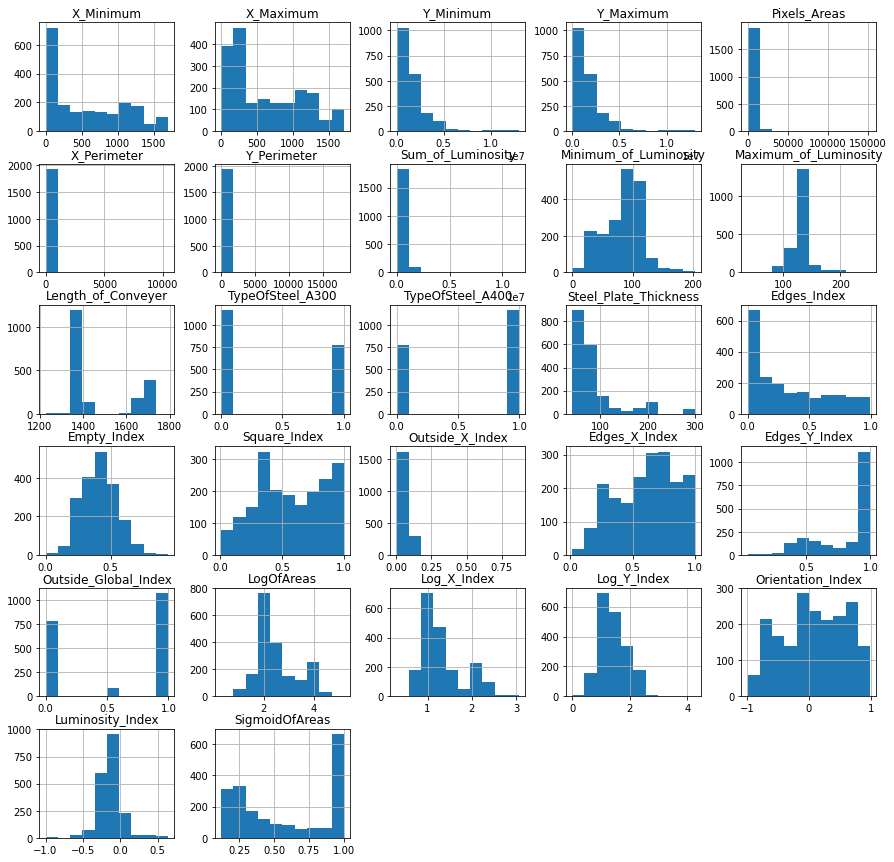

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,15))

plt.show()

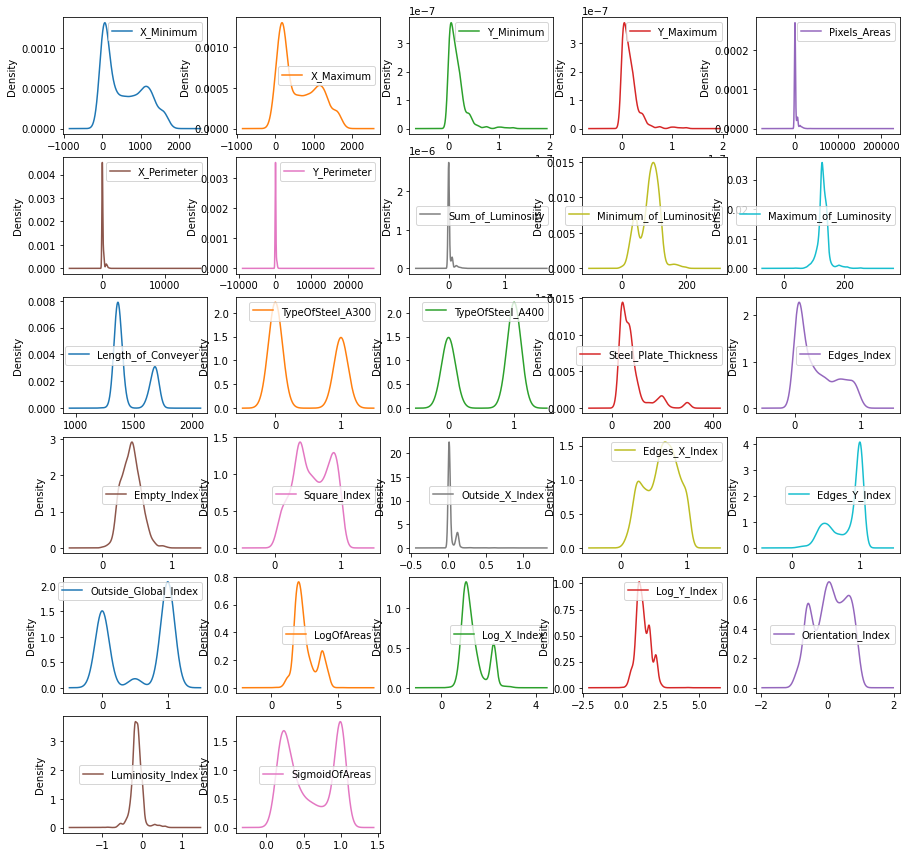

In [ ]:
df.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

In [ ]:
# X_Maximum - skew
# Steel_Plate_Thickness - skew
# Empty_Index - No Skew

In [ ]:
import numpy as np

df.X_Maximum.fillna(df.X_Maximum.median(),inplace=True)
df.Steel_Plate_Thickness.fillna(df.Steel_Plate_Thickness.median(),inplace=True)
df.Empty_Index.fillna(np.mean(df.Empty_Index),inplace=True)

In [ ]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
target                   0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

X=df.drop('target',axis=1)

Y=le.fit_transform(df['target'])

In [ ]:
le.classes_

array(['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry',
       'Stains', 'Z_Scratch'], dtype=object)

In [ ]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

{'Bumps': 0,
 'Dirtiness': 1,
 'K_Scatch': 2,
 'Other_Faults': 3,
 'Pastry': 4,
 'Stains': 5,
 'Z_Scratch': 6}

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, 
                                                 stratify=Y, 
                                                 test_size = 0.3,
                                                 random_state = 13)

In [ ]:
import seaborn as sns

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Fit Logistic Regression (Multinominal)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42, 
                            #solver ='saga', 
                            #class_weight = 'balanced', 
                            #penalty ='elasticnet',
                            #l1_ratio = 0.55,
                            #max_iter = 50,
                            )


logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg) # 0.46023564064801176
print(test_accuracy_score_logreg) # 0.46826758147512865

0.46023564064801176
0.46826758147512865


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


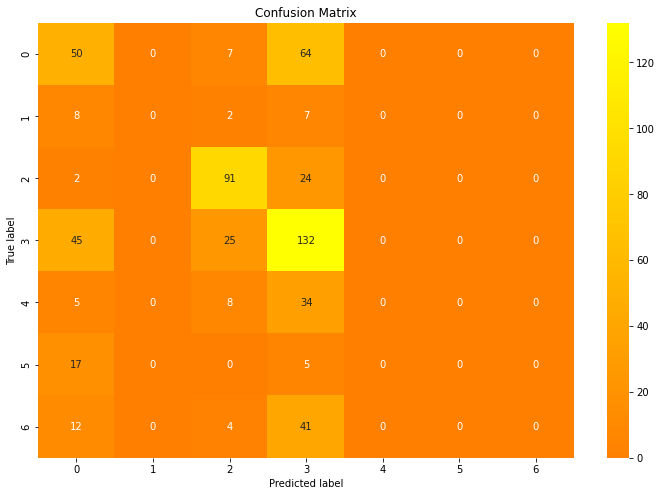

In [ ]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

### Fit Random Forest CLassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, 
                            n_estimators=50, 
                            max_depth=6, 
                            criterion = 'entropy', 
                            min_samples_leaf= 1,
                            min_samples_split= 2)

rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.7930780559646539
0.6998284734133791


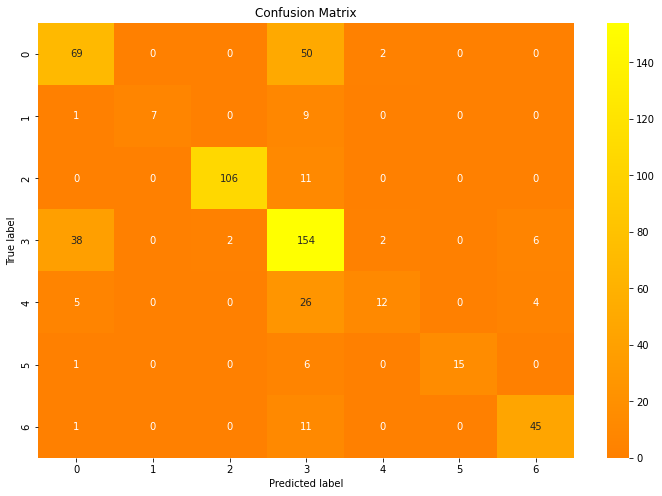

In [ ]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)